Processed Train Set Shape: (60, 64)
Selected features using Random Forest: ['EDm', 'KCd', 'ESm', 'SCd', 'Zd', 'Km', 'SFm', 'RSm', 'RTm', 'RGm']
Selected features using Logistic Regression: ['Asm', 'ASd', 'FMm', 'Chh', 'Rm', 'SCm', 'SCd', 'Zm', 'Zd', 'Km']


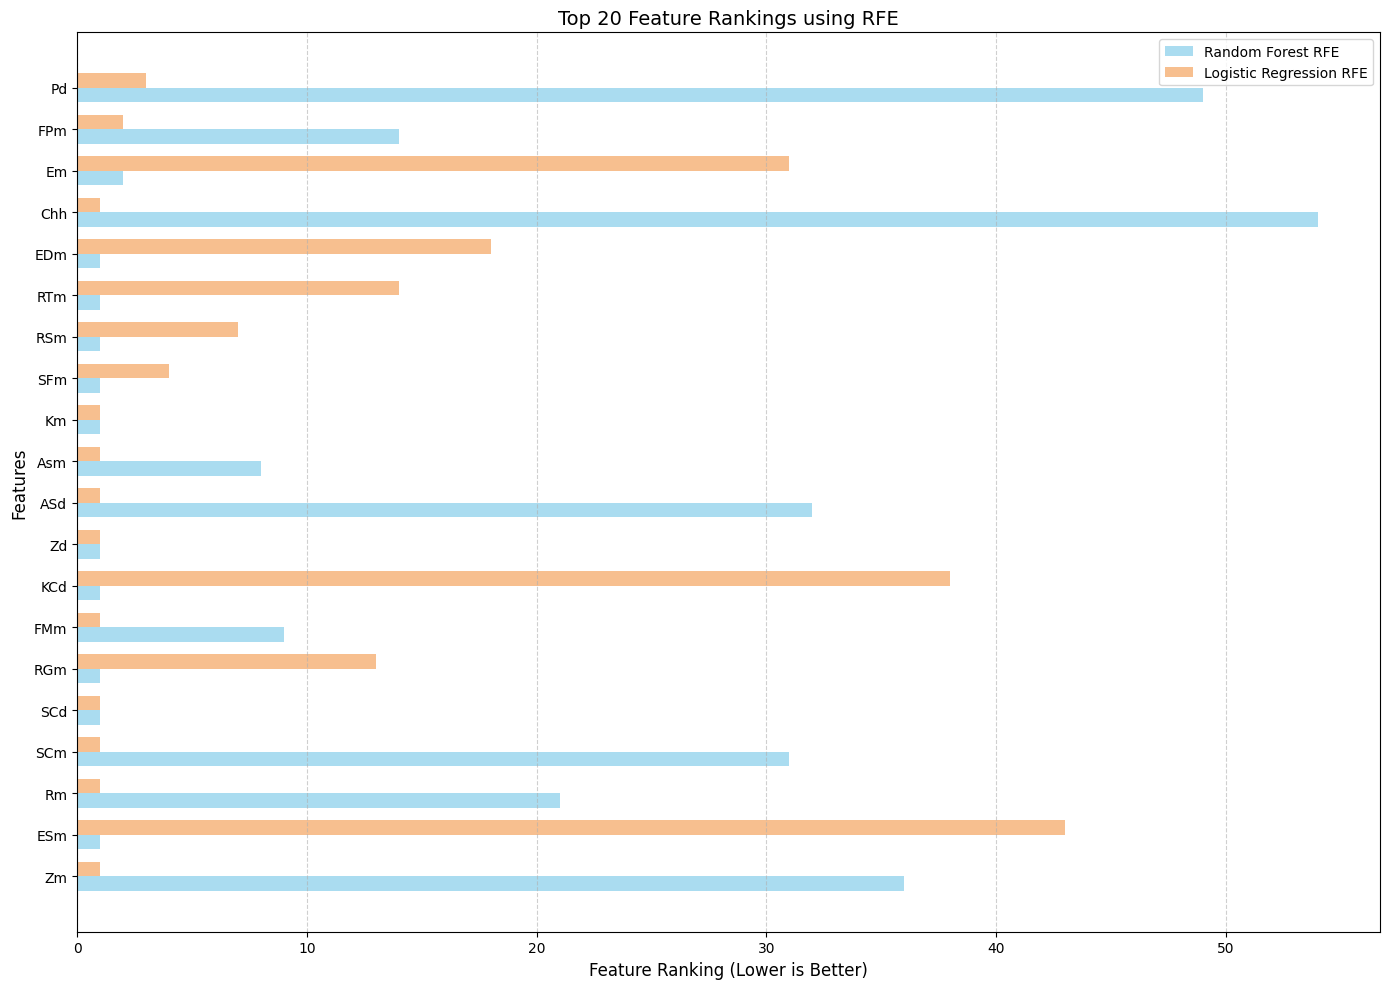

In [5]:
# Wrapper Methods for Feature Selection using RFE (Final Adjustments)

## Step 1: Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

## Step 2: Load the Dataset
processed_train_df = pd.read_csv('Processed_TrainSet.csv')

# Display dataset information
print("Processed Train Set Shape:", processed_train_df.shape)

## Step 3: Data Preparation
TARGET_COLUMN = 'class'  # Replace with the actual target column name if different

# Separate features and target
y = processed_train_df[TARGET_COLUMN]
X = processed_train_df.drop(columns=[TARGET_COLUMN])

# Encode target labels if necessary
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 4: Apply RFE with Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rfe_rf = RFE(estimator=rf_clf, n_features_to_select=10)
rfe_rf.fit(X_train, y_train)

selected_features_rf = X.columns[rfe_rf.support_]
print("Selected features using Random Forest:", selected_features_rf.tolist())

## Step 5: Apply RFE with Logistic Regression (Improved Settings)
log_reg = LogisticRegression(max_iter=2000, solver='liblinear', random_state=42)
rfe_log = RFE(estimator=log_reg, n_features_to_select=10)
rfe_log.fit(X_train, y_train)

selected_features_log = X.columns[rfe_log.support_]
print("Selected features using Logistic Regression:", selected_features_log.tolist())

## Step 6: Plot Feature Rankings (Final Adjustments)
import numpy as np

# Select top 20 features based on the minimum ranking between both models
top_features_indices = np.argsort(np.minimum(rfe_rf.ranking_, rfe_log.ranking_))[:20]
top_features = X.columns[top_features_indices]

plt.figure(figsize=(14, 10))
bar_width = 0.35
indices = np.arange(len(top_features))

plt.barh(indices, rfe_rf.ranking_[top_features_indices], bar_width, label='Random Forest RFE', alpha=0.7, color='skyblue')
plt.barh(indices + bar_width, rfe_log.ranking_[top_features_indices], bar_width, label='Logistic Regression RFE', alpha=0.7, color='sandybrown')

plt.yticks(indices + bar_width / 2, top_features, fontsize=10)
plt.xlabel("Feature Ranking (Lower is Better)", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("Top 20 Feature Rankings using RFE", fontsize=14)
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Improvements Made:
# - Plotted only the top 20 features to reduce clutter.
# - Increased font sizes for better readability.
# - Added grid lines for easier visual comparison.
# - Used distinct colors for clearer differentiation between models.
# - Improved alignment and spacing for a professional look.